In [1]:
import numpy as np

In [2]:
# 2b
TP = 5
FP = 2
TN = 2
FN = 1
C = [[TN, FP],
    [FN, TP]]

C

[[2, 2], [1, 5]]

In [3]:
# 2c
sen = TP / (TP + FN)
spe = TN / (TN + FP)
pfa = FP / (FP + TN)
pmiss = FN / (TP + FN)
pre = TP / (TP + FP)
crate = TP / (TP + FN)

AUC: 0.83


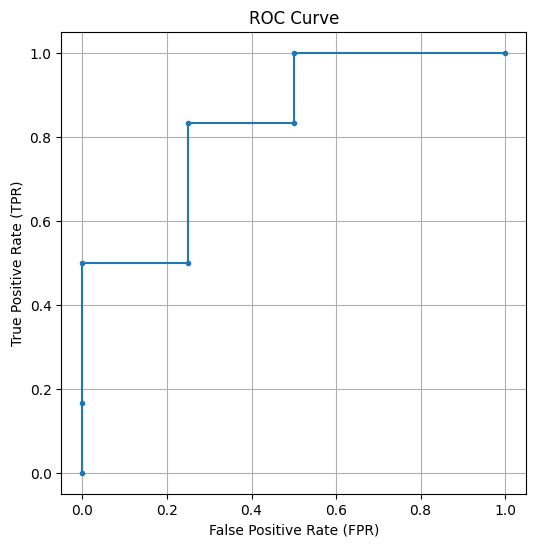

In [4]:
# 2d
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Provided data
true_labels = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
predicted_probabilities = [0.05, 0.15, 0.40, 0.55, 0.25, 0.45, 0.48, 0.62, 0.67, 0.75]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid(True)

# Show the plot
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Colab Notebooks/mnist_test.csv', 'r') as f:
  data = np.genfromtxt(f,delimiter=',')

labels = data[:, 0]
features = data[:, 1:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 3a
print(len(data))
print(features.shape[1])

10000
784


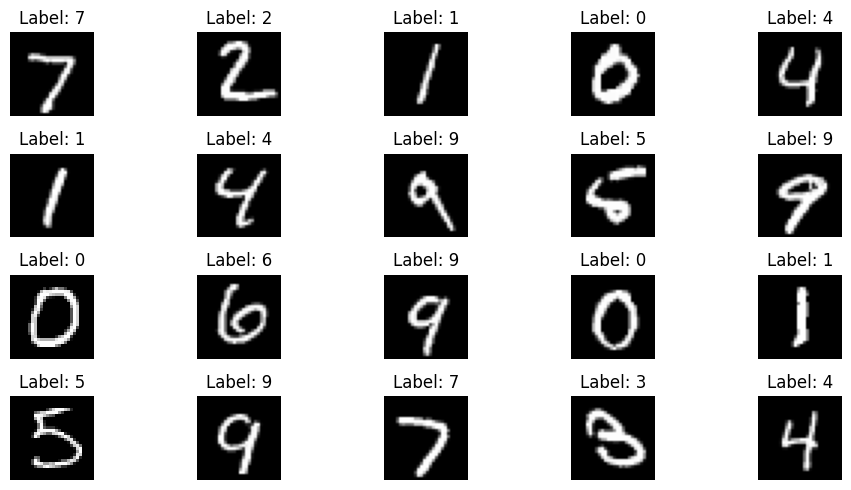

In [7]:
# 3b
import numpy as np
import matplotlib.pyplot as plt

num_samples_to_visualize = 20

plt.figure(figsize=(10, 5))
for i in range(num_samples_to_visualize):
    plt.subplot(4, 5, i + 1)
    plt.imshow(features[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {int(labels[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

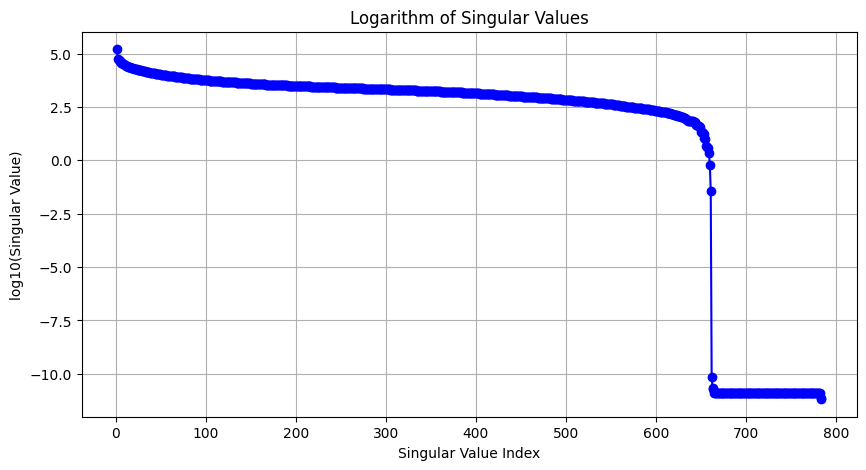

In [8]:
# 3c
U, s, VT = np.linalg.svd(features, full_matrices=False)

log_s = np.log10(s)

d = min(features.shape)
index_range = np.arange(1, d + 1)

plt.figure(figsize=(10, 5))
plt.plot(index_range, log_s, marker='o', linestyle='-', color='b')
plt.xlabel('Singular Value Index')
plt.ylabel('log10(Singular Value)')
plt.title('Logarithm of Singular Values')
plt.grid(True)
plt.show()

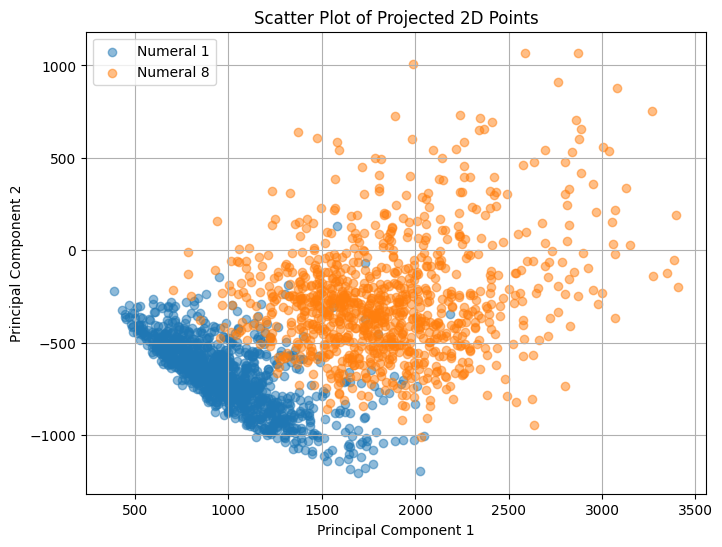

In [9]:
# 3d
V = VT[:2, :].T

Z = np.dot(features, V)

indices_1 = np.where(labels == 1)
indices_8 = np.where(labels == 8)
Z_1 = Z[indices_1]
Z_8 = Z[indices_8]

plt.figure(figsize=(8, 6))
plt.scatter(Z_1[:, 0], Z_1[:, 1], label='Numeral 1', alpha=0.5)
plt.scatter(Z_8[:, 0], Z_8[:, 1], label='Numeral 8', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Projected 2D Points')
plt.legend()
plt.grid(True)
plt.show()

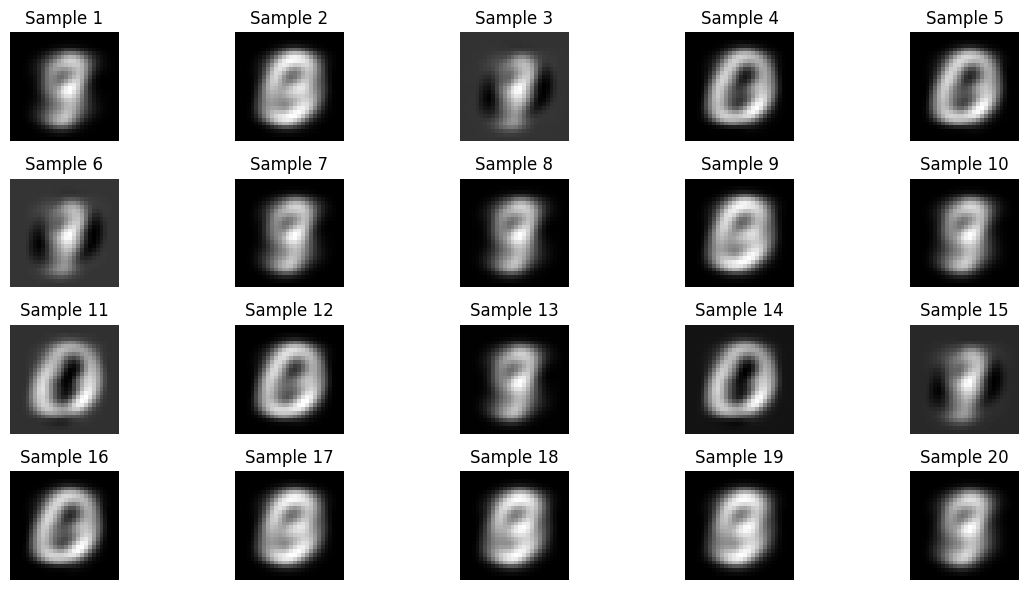

In [10]:
# 3e
d = 2

V = VT[:d, :].T

Z = np.dot(features, V)

Xhat = np.dot(Z, V.T)

plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(Xhat[i].reshape(28, 28), cmap='gray')
    plt.title(f"Sample {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()